# Python Third Exercise
***

**Ginés González Guirado**

*Date: 05/11/2023*

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap

**1.** Read the file with pandas and make a histogram of the z column. Write the meaning of the x and y axes, and label the graph. (0.5 pts)

In [2]:
df = pd.read_table("archivo_tabulado.cat", delim_whitespace=True)   # Data Frame
df

,#gal,field,ra,dec,mass,z,f,mag,dmag,re,...,zspec_legac_dr3,zspec_hathi,z_damjanov,z_damjanov_quality,hudf_for_B,hudf_for_V,hudf_for_I,hudf_for_Y,hudf_for_J,hudf_for_H
0,26,cosmos,150.060572,2.175582,1.872837e+10,0.817,0,21.1887,0.008493,0.155652,...,-99.0,-99.0000,-99.0,-99.0,0,0,0,0,0,0
1,130,cosmos,150.064230,2.178647,1.341220e+10,0.970,0,22.0935,0.016323,0.631092,...,-99.0,-99.0000,-99.0,-99.0,0,0,0,0,0,0
2,270,cosmos,150.082488,2.182182,2.171701e+10,0.810,0,21.0736,0.009481,0.652236,...,-99.0,0.6800,-99.0,-99.0,0,0,0,0,0,0
3,283,cosmos,150.072359,2.183000,1.364583e+10,0.960,0,22.0019,0.012504,0.466860,...,-99.0,0.9870,-99.0,-99.0,0,0,0,0,0,0
4,453,cosmos,150.125403,2.185425,1.248245e+11,2.020,0,21.5030,0.010735,0.197274,...,-99.0,-99.0000,-99.0,-99.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455,26782,uds,34.294930,-5.141848,2.650000e+10,0.620,0,20.3635,0.005557,0.190320,...,-99.0,0.6446,-99.0,-99.0,0,0,0,0,0,0
3456,26792,uds,34.373566,-5.148341,4.650000e+10,0.496,0,18.7597,0.003367,0.528378,...,-99.0,-99.0000,-99.0,-99.0,0,0,0,0,0,0
3457,26907,uds,34.285950,-5.140573,1.630000e+11,1.610,0,20.7987,0.007988,0.272964,...,-99.0,1.6708,-99.0,-99.0,0,0,0,0,0,0
3458,26952,uds,34.296085,-5.128668,3.200000e+10,0.820,0,21.2956,0.010898,0.266268,...,-99.0,-99.0000,-99.0,-99.0,0,0,0,0,0,0


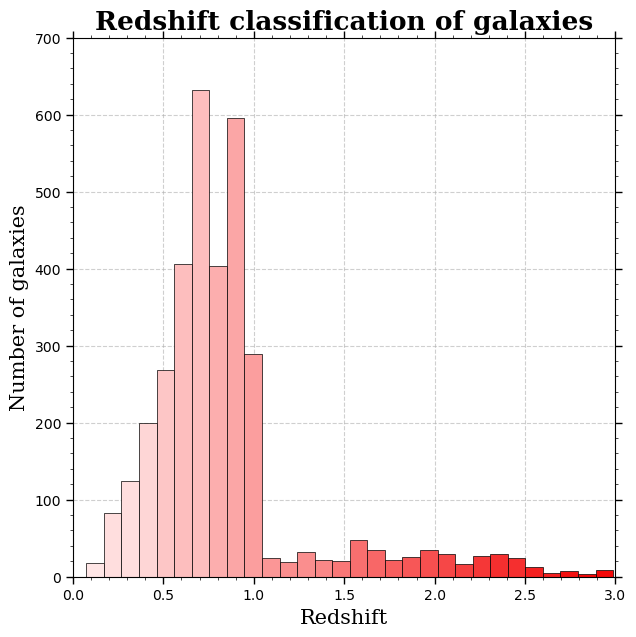

In [3]:
# Select the z column (redshift)
column_z = df['z']

# Create a custom colormap going from light red to dark red
colors = [(1, 0.9, 0.9), (0.95, 0, 0)]  # Adjusted red tones
custom_cmap = LinearSegmentedColormap.from_list('custom_red', colors, N=30)

# Histogram of z (redshift) using matplotlib
fig, ax = plt.subplots(figsize=(7,7), nrows=1, ncols=1)
n, bins, patches = ax.hist(column_z, bins=30, linewidth=0.5, edgecolor='black', zorder=2)

# Normalize the colormap to the frequency of values in each bin
norm = plt.Normalize(min(column_z), max(column_z))
for color, patch in zip(custom_cmap(norm(bins[:-1])), patches):  # calculates the color for each bin in the histogram
    patch.set_facecolor(color)                                   # colors each bar in the histogram according to the colormap

# Move the x-axis to y=0
ax.spines['bottom'].set_position('zero')

# Move the y-axis to x=0
ax.spines['left'].set_position('zero')

# Limits of the axes
x0 = 0
x1 = 3
y0 = 0
y1 = 700
ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)

# Set the size of major ticks
ax.tick_params(axis="x", labelsize=10, which="major", length=5, width=1)
ax.tick_params(axis="y", labelsize=10, which="major", length=5, width=1)
# Set the size of minor ticks
ax.tick_params(axis="x", labelsize=8, which="minor", length=2.5, width=0.5)
ax.tick_params(axis="y", labelsize=8, which="minor", length=2.5, width=0.5)

# Add major and minor ticks on both axes
ax.xaxis.set_major_locator(MultipleLocator(0.5))  # Set major tick interval to 0.5
ax.xaxis.set_minor_locator(MultipleLocator(0.1))  # Set minor tick interval to 0.1
ax.yaxis.set_major_locator(MultipleLocator(100))  # Set major tick interval to 100
ax.yaxis.set_minor_locator(MultipleLocator(20))  # Set minor tick interval to 20

ax.xaxis.set_ticks_position('both')    # The ticks appear on all the x edges of the graphic
ax.yaxis.set_ticks_position('both')    # The ticks appear on all the y edges of the graphic

# Set the labels of the axes and the title
ax.set_xlabel("Redshift", fontsize=15, fontfamily="serif")  # fontweight= grosor fuente (en 700 es negrita)
ax.set_ylabel("Number of galaxies", fontsize=15, fontfamily="serif")
ax.set_title("Redshift classification of galaxies", fontsize=19, fontweight=700, fontfamily="serif")

# Add grid lines behind the bars
ax.grid(True, linestyle='--', alpha=0.6, zorder=0)

plt.show();   # Show the graphic


**2.** Make a dot plot with the x axis being the mass and the y axis being the effective radii (column re). Cut the axes so that only masses below $3 \cdot 10^{11} M_{Sun}$ and positive effective radii are shown. Use points with a different shape for objects that have a Sérsic index (column n) greater or less than $2.5$. Two vertical lines should also appear on the graph, one at $5 \cdot 10^{10} M_{Sun}$ and another at $10^{11} M_{Sun}$. (0.5 pts)

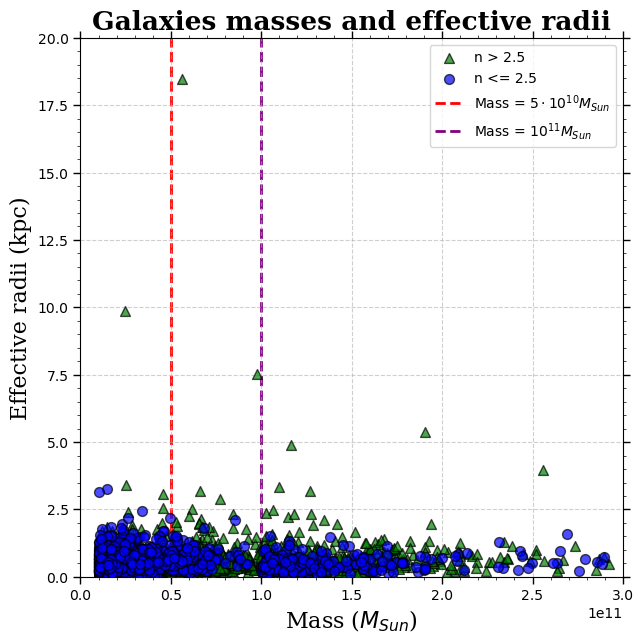

In [4]:
# Selecting and filtering the mass column for the x axis including only masses below 3e11 
# and the re column with only positive effective radii
filtered_df = df[(df['mass'] < 3e11) & (df['re'] > 0)]

# Separate data based on Sérsic index (n)
n_gt_2p5 = filtered_df[filtered_df['n'] > 2.5]
n_lt_2p5 = filtered_df[filtered_df['n'] <= 2.5]

# Limits of the x axis (mass)
m0 = 0
m1 = 3e11
# Limits of the y axis (effective radii)
re0 = 0
re1 = 20

# Dot plot of the mass and the effective radii using matplotlib
fig, ax = plt.subplots(figsize=(7, 7), nrows=1, ncols=1)

# Plot objects with n > 2.5 using different markers
ax.scatter(n_gt_2p5['mass'], n_gt_2p5['re'], 
           s=50,                  # Size of the markers
           c='green',             # Color of the markers
           marker='^',            # Marker style (e.g., 'o' for circles, 's' for squares, '^' for triangles)
           alpha=0.7,             # Marker transparency (0 for fully transparent, 1 for opaque)
           edgecolors='black',    # Edge color of the markers
           linewidths=1,          # Width of marker edges
           zorder=3,              # zorder: order in which elements are represented
           label='n > 2.5')       # label for the legend

# Plot objects with n <= 2.5 using different markers
ax.scatter(n_lt_2p5['mass'], n_lt_2p5['re'], 
           s=50,                  # Size of the markers
           c='blue',              # Color of the markers
           marker='o',            # Marker style (e.g., 'o' for circles, 's' for squares, '^' for triangles)
           alpha=0.7,             # Marker transparency (0 for fully transparent, 1 for opaque)
           edgecolors='black',    # Edge color of the markers
           linewidths=1,          # Width of marker edges
           zorder=3,              # zorder: order in which elements are represented
           label='n <= 2.5')      # label for the legend


# Move the x-axis to y=0
ax.spines['bottom'].set_position('zero')

# Move the y-axis to x=0
ax.spines['left'].set_position('zero')

# Limits of the axes
ax.set_xlim(m0, m1)
ax.set_ylim(re0, re1)

# Set the size of major ticks
ax.tick_params(axis="x", labelsize=10, which="major", length=5, width=1)
ax.tick_params(axis="y", labelsize=10, which="major", length=5, width=1)
# Set the size of minor ticks
ax.tick_params(axis="x", labelsize=8, which="minor", length=2.5, width=0.5)
ax.tick_params(axis="y", labelsize=8, which="minor", length=2.5, width=0.5)

# Add major and minor ticks on both axes
ax.xaxis.set_major_locator(MultipleLocator(0.5e11))  # Set major tick interval to 0.5e11
ax.xaxis.set_minor_locator(MultipleLocator(0.1e11))  # Set minor tick interval to 0.1e11
ax.yaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 2.5
ax.yaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 0.5


ax.xaxis.set_ticks_position('both')    # The ticks appear on all the edges of the graphic
ax.yaxis.set_ticks_position('both')    # The ticks appear on all the y edges of the graphic


# Vertical lines to appear at 5*10^{10} M_{Sun} and 10^{11} M_{Sun}
vline1 = ax.axvline(5e10, color='red', linestyle='--', linewidth=2, label='Mass = $5 \cdot 10^{10} M_{Sun}$', zorder=1, alpha=1)
vline2 = ax.axvline(1e11, color='purple', linestyle='--', linewidth=2, label='Mass = $10^{11} M_{Sun}$', zorder=1, alpha=1)


# Setting the labels of the x and y axes and the title
ax.set_xlabel("Mass ($M_{Sun}$)", fontsize=16, fontfamily="serif")  # fontweight= grosor fuente (en 700 es negrita)
ax.set_ylabel("Effective radii (kpc)", fontsize=16, fontfamily="serif")
ax.set_title("Galaxies masses and effective radii", fontsize=19, fontweight=700, fontfamily="serif")

# Shows the legend
ax.legend(fontsize=10, loc="upper right")

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.6, zorder=0)

plt.show();   # Show the graphic

**3.** Given the tabulated files 17058_goodss_$*$.cat, create four graphs, putting in each of them the luminosity profile of the galaxy (the x-axis being the distance in pixels or arc seconds, y-axis the sb column of surface brightness, but putting the smallest numbers at the top of the axis - that is, the largest values are 18, 19,... and the smallest 30, 31...; see the example in the image below). Add the error bars on the y-axis (sb_error column). Create another graph with the four lines superimposed and containing a legend with the name of the filters. (0.5 pts)

In [5]:
df1 = pd.read_table("17058_goodss_H.cat", delim_whitespace=True)   # Data Frame

df1

,#vector_dist_arcsec,vector_dist_kpc,sb,sb_error
0,0.073580,0.5,20.254278,0.042811
1,0.220741,1.5,20.751957,0.026368
2,0.367902,2.5,21.205255,0.018867
3,0.515063,3.5,21.494477,0.012200
4,0.662224,4.5,21.704518,0.013028
...,...,...,...,...
94,13.906702,94.5,NaN,NaN
95,14.053863,95.5,NaN,NaN
96,14.201024,96.5,NaN,NaN
97,14.348185,97.5,NaN,NaN


In [6]:
df2 = pd.read_table("17058_goodss_I.cat", delim_whitespace=True)   # Data Frame
df2

,#vector_dist_arcsec,vector_dist_kpc,sb,sb_error
0,0.073580,0.5,21.474919,0.033846
1,0.220741,1.5,22.256679,0.018279
2,0.367902,2.5,22.722027,0.009583
3,0.515063,3.5,22.830632,0.007382
4,0.662224,4.5,23.041365,0.010061
...,...,...,...,...
94,13.906702,94.5,30.702895,0.427756
95,14.053863,95.5,30.579010,0.394519
96,14.201024,96.5,30.741251,0.471591
97,14.348185,97.5,30.538348,0.403491


In [7]:
df3 = pd.read_table("17058_goodss_J.cat", delim_whitespace=True)   # Data Frame
df3

,#vector_dist_arcsec,vector_dist_kpc,sb,sb_error
0,0.073580,0.5,20.542358,0.045785
1,0.220741,1.5,21.059050,0.029305
2,0.367902,2.5,21.546470,0.015829
3,0.515063,3.5,21.787125,0.012043
4,0.662224,4.5,21.988716,0.013817
...,...,...,...,...
94,13.906702,94.5,31.897490,27.457574
95,14.053863,95.5,31.297234,26.948496
96,14.201024,96.5,30.880564,26.619814
97,14.348185,97.5,NaN,NaN


In [8]:
df4 = pd.read_table("17058_goodss_V.cat", delim_whitespace=True)   # Data Frame
df4

,#vector_dist_arcsec,vector_dist_kpc,sb,sb_error
0,0.073580,0.5,22.273288,0.028086
1,0.220741,1.5,22.970472,0.023378
2,0.367902,2.5,23.499639,0.012094
3,0.515063,3.5,23.429775,0.011623
4,0.662224,4.5,23.635921,0.014568
...,...,...,...,...
94,13.906702,94.5,30.302811,0.346876
95,14.053863,95.5,30.080601,0.301603
96,14.201024,96.5,30.441446,0.398299
97,14.348185,97.5,30.528439,0.429800


Creating the graphs.

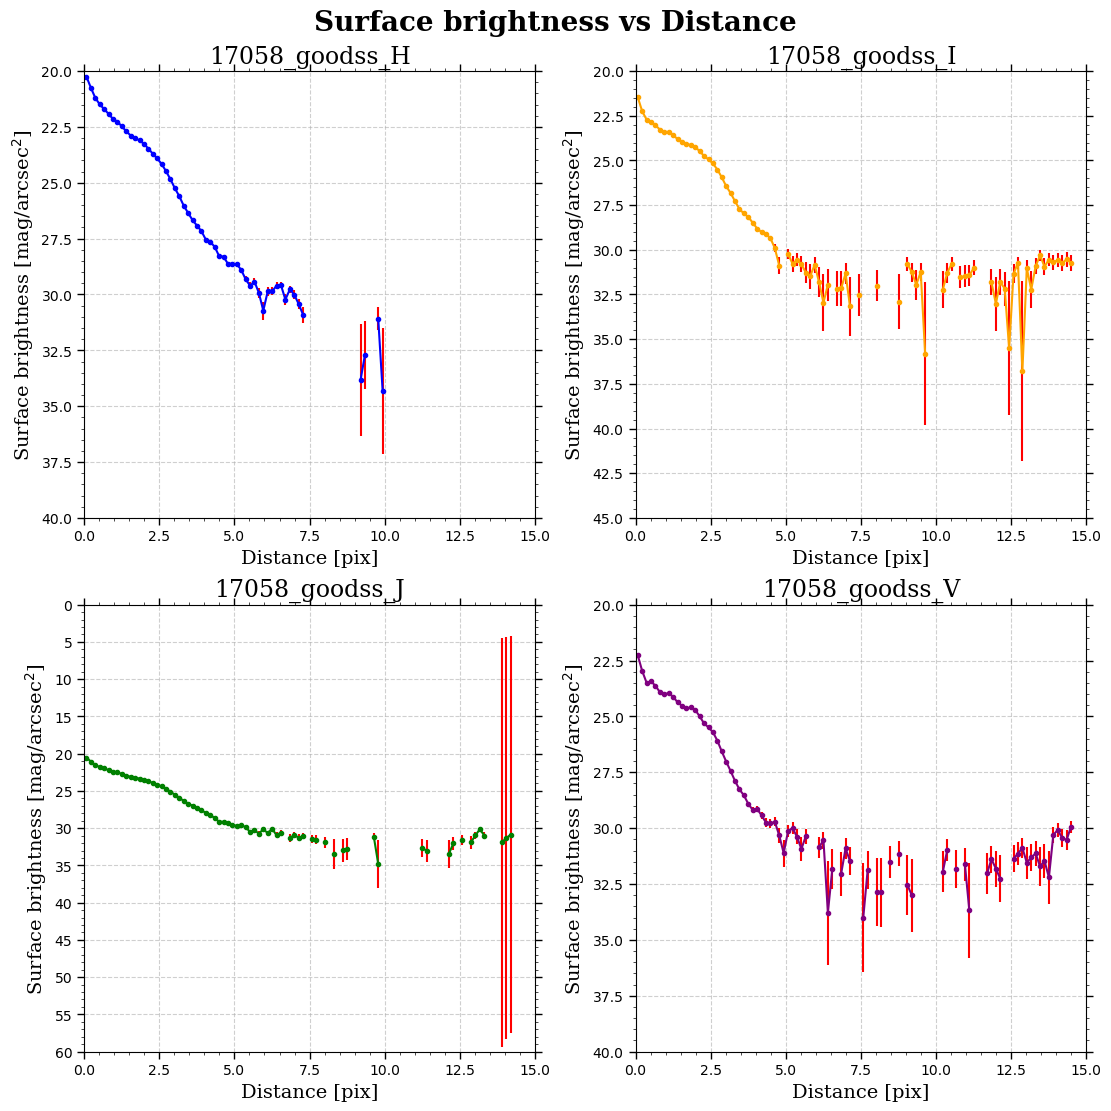

In [9]:
# Selecting the columns vector_dist_arcsec (distance in pixels or arc seconds), sb (surface brightness) and sb_error
# For df1
distance_in_arcsec1 = df1['#vector_dist_arcsec']
surface_brightness1 = df1['sb']
surface_brightness_error1 = df1['sb_error']
# For df2
distance_in_arcsec2 = df2['#vector_dist_arcsec']
surface_brightness2 = df2['sb']
surface_brightness_error2 = df2['sb_error']
# For df3
distance_in_arcsec3 = df3['#vector_dist_arcsec']
surface_brightness3 = df3['sb']
surface_brightness_error3 = df3['sb_error']
# For df4
distance_in_arcsec4 = df4['#vector_dist_arcsec']
surface_brightness4 = df4['sb']
surface_brightness_error4 = df4['sb_error']

# Limits of the x axis (mass)
d0 = 0
d1 = 15
# Limits of the y axis (effective radii) for the first graphic
sb0 = 20
sb1 = 40
# Limits of the y axis (effective radii) for the second graphic
sb2 = 20
sb3 = 45
# Limits of the y axis (effective radii) for the third graphic
sb4 = 0
sb5 = 60
# Limits of the y axis (effective radii) for the fourth graphic
sb6 = 20
sb7 = 40

# Plots
fig, axs = plt.subplots(2, 2, figsize=(11, 11), layout='constrained')   # layout='constrained' To ensure proper spacing of subplots
fig.suptitle('Surface brightness vs Distance', fontsize=20, fontweight=700, fontfamily="serif")
axs[0, 0].errorbar(distance_in_arcsec1, surface_brightness1, xerr=0, yerr = surface_brightness_error1, ecolor = 'red', 
                   color='blue', fmt='o-', markersize=3)
axs[0, 0].set_xlim(d0, d1)
axs[0, 0].set_ylim(sb0, sb1)
axs[0, 0].set_xlabel("Distance [pix]", fontsize=14, fontfamily="serif")
axs[0, 0].set_ylabel("Surface brightness [mag/arcsec$^2$]", fontsize=14, fontfamily="serif")
axs[0, 0].set_title('17058_goodss_H', fontsize=17, fontfamily="serif")
axs[0, 1].errorbar(distance_in_arcsec2, surface_brightness2, xerr=0, yerr = surface_brightness_error2, ecolor = 'red', 
                   color='orange', fmt='o-', markersize=3)
axs[0, 1].set_xlim(d0, d1)
axs[0, 1].set_ylim(sb2, sb3)
axs[0, 1].set_xlabel("Distance [pix]", fontsize=14, fontfamily="serif")
axs[0, 1].set_ylabel("Surface brightness [mag/arcsec$^2$]", fontsize=14, fontfamily="serif")
axs[0, 1].set_title('17058_goodss_I', fontsize=17, fontfamily="serif")
axs[1, 0].errorbar(distance_in_arcsec3, surface_brightness3, xerr=0, yerr = surface_brightness_error3, ecolor = 'red', 
                   color='green', fmt='o-', markersize=3)
axs[1, 0].set_xlim(d0, d1)
axs[1, 0].set_ylim(sb4, sb5)
axs[1, 0].set_xlabel("Distance [pix]", fontsize=14, fontfamily="serif")
axs[1, 0].set_ylabel("Surface brightness [mag/arcsec$^2$]", fontsize=14, fontfamily="serif")
axs[1, 0].set_title('17058_goodss_J', fontsize=17, fontfamily="serif")
axs[1, 1].errorbar(distance_in_arcsec4, surface_brightness4, xerr=0, yerr = surface_brightness_error4, ecolor = 'red', 
                   color='purple', fmt='o-', markersize=3)
axs[1, 1].set_xlim(d0, d1)
axs[1, 1].set_ylim(sb6, sb7)
axs[1, 1].set_xlabel("Distance [pix]", fontsize=14, fontfamily="serif")
axs[1, 1].set_ylabel("Surface brightness [mag/arcsec$^2$]", fontsize=14, fontfamily="serif")
axs[1, 1].set_title('17058_goodss_V', fontsize=17, fontfamily="serif")


# Set the size of major ticks
axs[0, 0].tick_params(axis="x", labelsize=10, which="major", length=5, width=1)
axs[0, 0].tick_params(axis="y", labelsize=10, which="major", length=5, width=1)
axs[0, 1].tick_params(axis="x", labelsize=10, which="major", length=5, width=1)
axs[0, 1].tick_params(axis="y", labelsize=10, which="major", length=5, width=1)
axs[1, 0].tick_params(axis="x", labelsize=10, which="major", length=5, width=1)
axs[1, 0].tick_params(axis="y", labelsize=10, which="major", length=5, width=1)
axs[1, 1].tick_params(axis="x", labelsize=10, which="major", length=5, width=1)
axs[1, 1].tick_params(axis="y", labelsize=10, which="major", length=5, width=1)
# Set the size of minor ticks
axs[0, 0].tick_params(axis="x", labelsize=8, which="minor", length=2.5, width=0.5)
axs[0, 0].tick_params(axis="y", labelsize=8, which="minor", length=2.5, width=0.5)
axs[0, 1].tick_params(axis="x", labelsize=8, which="minor", length=2.5, width=0.5)
axs[0, 1].tick_params(axis="y", labelsize=8, which="minor", length=2.5, width=0.5)
axs[1, 0].tick_params(axis="x", labelsize=8, which="minor", length=2.5, width=0.5)
axs[1, 0].tick_params(axis="y", labelsize=8, which="minor", length=2.5, width=0.5)
axs[1, 1].tick_params(axis="x", labelsize=8, which="minor", length=2.5, width=0.5)
axs[1, 1].tick_params(axis="y", labelsize=8, which="minor", length=2.5, width=0.5)

# Add major and minor ticks on both axes
axs[0, 0].xaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 2.5
axs[0, 0].xaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 0.5
axs[0, 0].yaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 5
axs[0, 0].yaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 1

axs[0, 1].xaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 2.5
axs[0, 1].xaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 0.5
axs[0, 1].yaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 5
axs[0, 1].yaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 1

axs[1, 0].xaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 2.5
axs[1, 0].xaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 0.5
axs[1, 0].yaxis.set_major_locator(MultipleLocator(5))  # Set major tick interval to 5
axs[1, 0].yaxis.set_minor_locator(MultipleLocator(1))  # Set minor tick interval to 1

axs[1, 1].xaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 2.5
axs[1, 1].xaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 0.5
axs[1, 1].yaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 5
axs[1, 1].yaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 1


# Add tick labels on the left side of the plots
for ax in axs[:, 1]:
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_ticks_position("left")
    
# Add tick labels on the bottom of the plots
for ax in axs[0, :]:
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_ticks_position("bottom")
    
# The ticks appear on all the edges of the graphic
for ax in axs.flat:
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    
# Reverse the y-axis direction for each subplot
for ax in axs.flat:
    ax.invert_yaxis()

# Create a grid for all the subplots
for ax in axs.flat:
    ax.grid(True, linestyle='--', alpha=0.6, zorder=0)

plt.show();

Creating the graph with the four lines superimposed and containing a legend with the name of the filters.

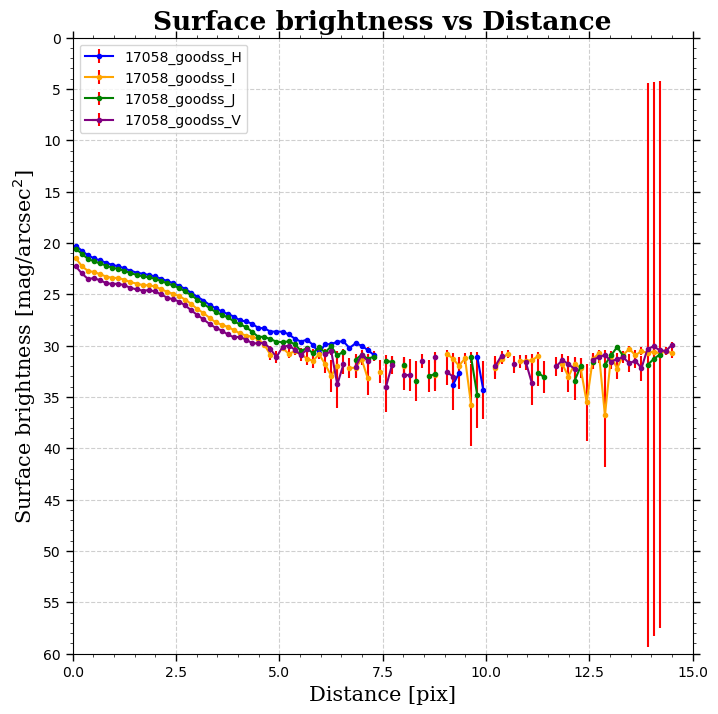

In [10]:
# Selecting the columns vector_dist_arcsec (distance in pixels or arc seconds), sb (surface brightness) and sb_error
# For df1
distance_in_arcsec1 = df1['#vector_dist_arcsec']
surface_brightness1 = df1['sb']
surface_brightness_error1 = df1['sb_error']
# For df2
distance_in_arcsec2 = df2['#vector_dist_arcsec']
surface_brightness2 = df2['sb']
surface_brightness_error2 = df2['sb_error']
# For df3
distance_in_arcsec3 = df3['#vector_dist_arcsec']
surface_brightness3 = df3['sb']
surface_brightness_error3 = df3['sb_error']
# For df4
distance_in_arcsec4 = df4['#vector_dist_arcsec']
surface_brightness4 = df4['sb']
surface_brightness_error4 = df4['sb_error']

# Limits of the x axis (mass)
d0 = 0
d1 = 15
# Limits of the y axis (effective radii)
sb0 = 0
sb1 = 60

# Plots
fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=1)
ax.errorbar(distance_in_arcsec1, surface_brightness1, xerr=0, yerr = surface_brightness_error1, ecolor = 'red', 
                   color='blue', fmt='o-', markersize=3, label="17058_goodss_H")
ax.errorbar(distance_in_arcsec2, surface_brightness2, xerr=0, yerr = surface_brightness_error2, ecolor = 'red', 
                   color='orange', fmt='o-', markersize=3, label="17058_goodss_I")
ax.errorbar(distance_in_arcsec3, surface_brightness3, xerr=0, yerr = surface_brightness_error3, ecolor = 'red', 
                   color='green', fmt='o-', markersize=3, label="17058_goodss_J")
ax.errorbar(distance_in_arcsec4, surface_brightness4, xerr=0, yerr = surface_brightness_error4, ecolor = 'red', 
                   color='purple', fmt='o-', markersize=3, label="17058_goodss_V")

# Set the limits for the axes
ax.set_xlim(d0, d1)
ax.set_ylim(sb0, sb1)

# Set the size of major ticks
ax.tick_params(axis="x", labelsize=10, which="major", length=5, width=1)
ax.tick_params(axis="y", labelsize=10, which="major", length=5, width=1)

# Set the size of minor ticks
ax.tick_params(axis="x", labelsize=8, which="minor", length=2.5, width=0.5)
ax.tick_params(axis="y", labelsize=8, which="minor", length=2.5, width=0.5)


# Add major and minor ticks on both axes
ax.xaxis.set_major_locator(MultipleLocator(2.5))  # Set major tick interval to 5
ax.xaxis.set_minor_locator(MultipleLocator(0.5))  # Set minor tick interval to 1
ax.yaxis.set_major_locator(MultipleLocator(5))  # Set major tick interval to 5
ax.yaxis.set_minor_locator(MultipleLocator(1))  # Set minor tick interval to 1


# The ticks appear on all the edges of the graphic
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
    
# Reverse the y-axis direction for each subplot
ax.invert_yaxis()

# Set labels and the title
ax.set_xlabel("Distance [pix]", fontsize=15, fontfamily="serif")  # fontweight= grosor fuente (en 700 es negrita)
ax.set_ylabel("Surface brightness [mag/arcsec$^2$]", fontsize=15, fontfamily="serif")
ax.set_title("Surface brightness vs Distance", fontsize=19, fontweight=700, fontfamily="serif")

# Shows the legend
ax.legend(fontsize=10, loc="upper left")

# Create a grid
ax.grid(True, linestyle='--', alpha=0.6, zorder=0)

plt.show();

**4.** Compare the code you wrote in the last exercise with what ChatGPT would do to do the same thing. Write a short comment about the differences and how you think ChatGPT's solution could be better than yours. (0.5 pts)

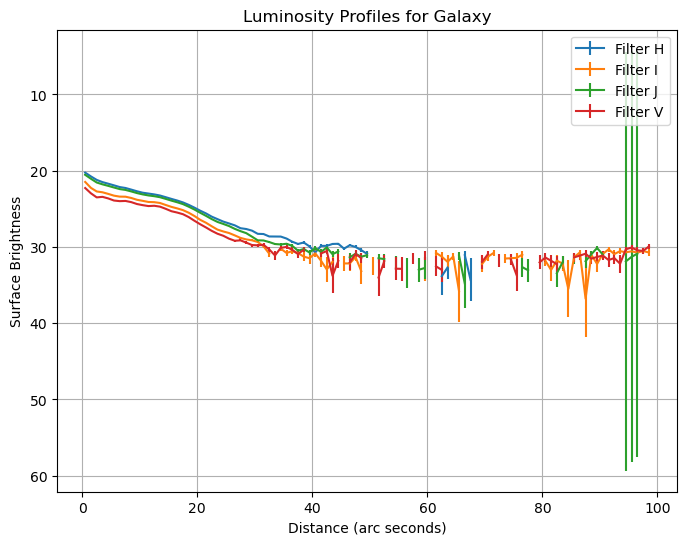

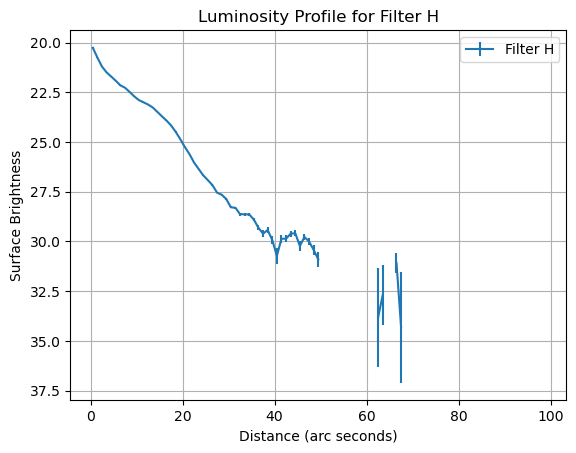

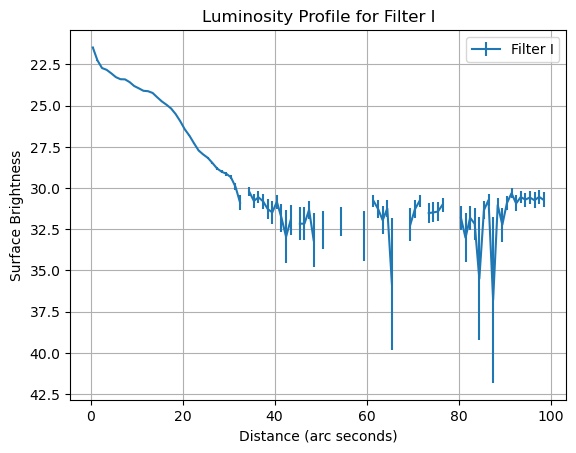

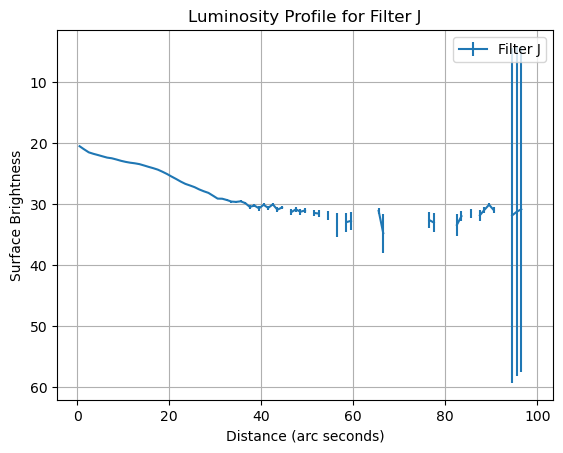

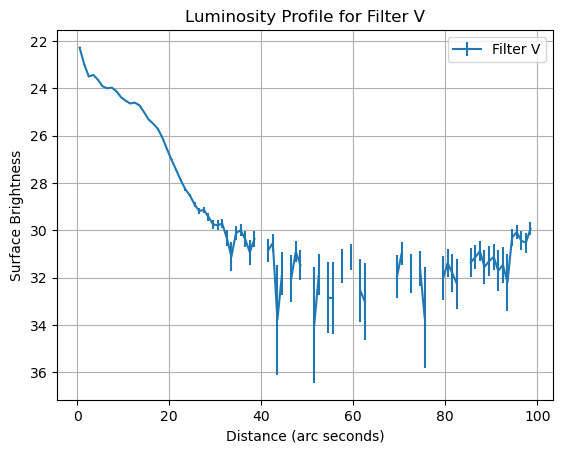

In [11]:
# ChatGPT's code
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from tabulated files
files = ['17058_goodss_H.cat', '17058_goodss_I.cat', '17058_goodss_J.cat', '17058_goodss_V.cat']
filter_names = ['H', 'I', 'J', 'V']  # Replace with appropriate filter names
data_frames = []

# Loop through each file and load the data into data frames
for file in files:
    # Read the data from the file, skip the header row, and name the columns
    data = pd.read_table(file, delimiter='\s+', header=None, names=['#vector_dist_arcsec', 'sb', 'sb_error'], skiprows=1)
    data_frames.append(data)

# Create the main plot for all filters
plt.figure(figsize=(8, 6))

# Plot each filter's luminosity profile with error bars
for i, data in enumerate(data_frames):
    plt.errorbar(data['#vector_dist_arcsec'], data['sb'], yerr=data['sb_error'], label=f'Filter {filter_names[i]}')

# Set axis labels, invert y-axis, add legend, and set the title
plt.xlabel('Distance (arc seconds)')
plt.ylabel('Surface Brightness')
plt.gca().invert_yaxis()  # Invert the y-axis to have smaller values at the top
plt.legend()
plt.title('Luminosity Profiles for Galaxy')
plt.grid(True)

# Save individual plots for each filter
for i, data in enumerate(data_frames):
    plt.figure()
    plt.errorbar(data['#vector_dist_arcsec'], data['sb'], yerr=data['sb_error'], label=f'Filter {filter_names[i]}')
    plt.xlabel('Distance (arc seconds)')
    plt.ylabel('Surface Brightness')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.title(f'Luminosity Profile for Filter {filter_names[i]}')
    plt.grid(True)

# Show all the plots
plt.show()


The clearest difference is that my code is much longer than the one provided by ChatGPT. ChatGPT uses a list to save the files, open them with a loop and save the data tables in an empty list, appending them with .append, while I have opened the files one by one without a loop.

To generate each graph it uses a loop, however, I have done it again individually and added more arguments to specify the colors and sizes of the different objects (error bars, lines and points).
Then, I have added some things to try to make the graphs more beautiful, while Chat GPT has made it more direct. For ChatGPT to do what I have done, it would have to be asked explicitly.

In conclusion, ChatGPT has made a code similar to mine and that, in principle, meets what the task requires, but in a much more compact way than me, that is, with many fewer lines of code when using loops.

**5.** Using TOPCAT (and not Jupyter Notebooks) create a 3D graph in pdf format whose axes are the right ascension (x axis), declination (y axis) and z (z axis). Color the points according to their mass. (0.5 pts)

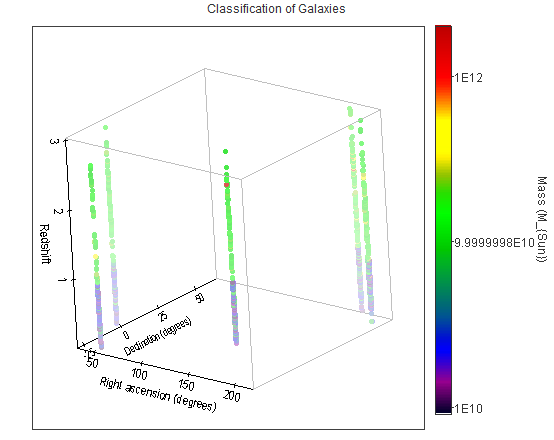

Comments: 

To put the units of right ascension, I have had doubts because it is usually expressed in hours. However, based on the numbers that appear, it seems to me that the most reasonable thing is for the data to be taken in degrees, although since the units are not specified in the table, I am not sure.

The scale of the color bar is logarithmic so that the masses of the different points can be better differentiated.